In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
import csv


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Tassk_1/McDonal Data/McDonald_s_Reviews.csv",encoding='latin1')
df

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star
...,...,...,...,...,...,...,...,...,...,...
33391,33392,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",4 years ago,They treated me very badly.,1 star
33392,33393,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,The service is very good,5 stars
33393,33394,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,To remove hunger is enough,4 stars
33394,33395,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",5 years ago,"It's good, but lately it has become very expen...",5 stars


# Getting the Data Ready and preprocessing

In [5]:
 df['Labels'] = np.where(df['rating'] > '3 stars', 'Positive', np.where(df['rating'] < '3 starts', 'Negative', 'Neutral'))
df

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating,Labels
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star,Negative
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars,Positive
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star,Negative
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars,Positive
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star,Negative
...,...,...,...,...,...,...,...,...,...,...,...
33391,33392,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",4 years ago,They treated me very badly.,1 star,Negative
33392,33393,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,The service is very good,5 stars,Positive
33393,33394,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,To remove hunger is enough,4 stars,Positive
33394,33395,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",5 years ago,"It's good, but lately it has become very expen...",5 stars,Positive


In [6]:
x = df["review"]
y =df["Labels"]
x

0        Why does it look like someone spit on my food?...
1        It'd McDonalds. It is what it is as far as the...
2        Made a mobile order got to the speaker and che...
3        My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...
4        I repeat my order 3 times in the drive thru, a...
                               ...                        
33391                          They treated me very badly.
33392                             The service is very good
33393                           To remove hunger is enough
33394    It's good, but lately it has become very expen...
33395                            they took good care of me
Name: review, Length: 33396, dtype: object

## Data Cleaning and preprocessing

In [7]:
cr = (r'[^a-zA-Z0-9\s]')
for i in cr:
  df['review']= df['review'].str.replace(cr, '')
x= df['review']
x

<ipython-input-7-3223c9472834>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['review']= df['review'].str.replace(cr, '')


0        Why does it look like someone spit on my food\...
1        Itd McDonalds It is what it is as far as the f...
2        Made a mobile order got to the speaker and che...
3        My mc Crispy chicken sandwich was  customer se...
4        I repeat my order 3 times in the drive thru an...
                               ...                        
33391                           They treated me very badly
33392                             The service is very good
33393                           To remove hunger is enough
33394     Its good but lately it has become very expensive
33395                            they took good care of me
Name: review, Length: 33396, dtype: object

In [8]:
x = x.str.lower()
x

0        why does it look like someone spit on my food\...
1        itd mcdonalds it is what it is as far as the f...
2        made a mobile order got to the speaker and che...
3        my mc crispy chicken sandwich was  customer se...
4        i repeat my order 3 times in the drive thru an...
                               ...                        
33391                           they treated me very badly
33392                             the service is very good
33393                           to remove hunger is enough
33394     its good but lately it has become very expensive
33395                            they took good care of me
Name: review, Length: 33396, dtype: object

### Exploratory Data Analysis (EDA)

In [9]:
x.describe()

count          33396
unique         21730
top       excellent 
freq            2148
Name: review, dtype: object

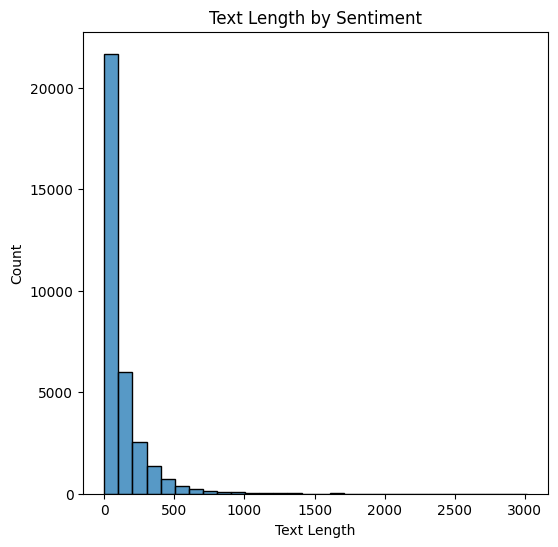

In [9]:
# Text Length Analysis
df['text_length'] = df['review'].apply(len)

plt.figure(figsize=(6, 6))
sns.histplot(data=df, x='text_length', hue=None,  bins=30)
plt.title('Text Length by Sentiment')
plt.xlabel('Text Length')
plt.show()


## Feature Engineering:


In [10]:
# TF-IDF (Term Frequency-Inverse Document Frequency)
vector = TfidfVectorizer()

# Fit and transform

tfidx_matrix = vector.fit_transform(x)

# No converting matrix  into array

x = tfidx_matrix.toarray()
print (x)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Model Selection :1 & Model Training
**Machine Learning**

In [42]:
# Use Logistic Regression
np.random.seed(42)
model = LogisticRegression()

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20)

In [43]:
# Fit the model in x and y
model.fit(x_train, y_train)

LogisticRegression()

In [44]:
model.score(x_test, y_test)

0.8741017964071857

## Model Evaluation 1

In [11]:
# Classification Report (Precision, Recall , F1 Score )

y_preds = model.predict(x_test)
y_true = y_test
print(classification_report(y_true, y_preds))

NameError: ignored

In [38]:
# Now Confusion Matrix

print(confusion_matrix(y_true, y_preds))

[[3598  401]
 [ 559 3124]]


## Model Selection :  2 & model training
**Machine learning**


In [11]:
# use Support vactor Machines
model1 = SVC()
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.40)

In [ ]:
model1.fit(x_train, y_train)

In [ ]:
model.score(x_test, y_test)

## Model Evaluation 2

In [ ]:
# Classification Report (Precision, Recall , F1 Score )

y_preds = model1.predict(x_test)
y_true = y_test
print(classification_report(y_true, y_preds))

In [ ]:
# Now Confusion Matrix

print(confusion_matrix(y_true, y_preds))